<a href="https://colab.research.google.com/github/mhriyad99/Clinically-Adaptable-Machine-Learning-Model-To-Identify-Early-Appreciable-Feature-of-Diabetes/blob/main/Diabetes_Data_Analysis_3_(Combined).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
plt.rc('axes', titlesize = 18)        # font size of title
plt.rc('axes', labelsize = 14)        # font size of x and y label
plt.rc('xtick', labelsize = 13)       # font size of tick label
plt.rc('ytick', labelsize = 13)       # font size of tick label
plt.rc('legend', fontsize = 13)       # legend fontsize
plt.rc('font', size = 13)             # controls default text size

In [3]:
data_c = pd.read_csv("/content/Questionaries' for pre-diagnose diabetes (Responses) - Form Responses 1(cleaned).csv")
data_s = pd.read_csv("/content/Diabetes data shylet medical.csv")

In [4]:
data_c.head()

,Age,Gender,Weight,Smoking,High Blood Pressure,Parental Diabetes Mellitus,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Partial paresis,Muscle stiffness,Alopecia,Diabetes
0,38.060144,Female,61,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,27.000000,Female,74,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No
2,55.000000,Male,65,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
3,54.000000,Female,52,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,Yes
4,69.000000,Male,62,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes


In [5]:
data_s.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


#**Data Preprocessing**
In this section we will mainly focus on combining the two datasets one collected from the field and the other from UCI Machine learning repository. Particularly, we will ensure that the two datasets must've similar attributes(columns) and data types.

In [6]:
 col_s = data_s.columns
 col_s

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
col_c = data_c.columns
col_c

Index(['Age', 'Gender', 'Weight', 'Smoking', 'High Blood Pressure',
       'Parental Diabetes Mellitus', 'Polyuria', 'Polydipsia ', 'Polyphagia',
       'Sudden weight loss', 'Weakness ', 'Delayed Healing', 'Blurred vision',
       'Itching', 'Irritability ', 'Partial paresis', 'Muscle stiffness',
       'Alopecia', 'Diabetes '],
      dtype='object')

In [8]:
new_cols = {'Age':'Age', 'Gender':'Gender','Polyuria':'Polyuria', 'Polydipsia':'Polydipsia ', 'Polyphagia':'Polyphagia',
       'sudden weight loss':'Sudden weight loss', 'weakness':'Weakness ', 'delayed healing':'Delayed Healing', 'visual blurring':'Blurred vision',
       'Itching':'Itching', 'Irritability':'Irritability ', 'Partial paresis':'Partial paresis',
       'muscle stiffness':'Muscle stiffness Muscle', 'Alopecia':'Alopecia', 'class':'Diabetes '}

In [9]:
data_s.rename(columns= new_cols, inplace= True)

In [10]:
data_s.head()

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Blurred vision,Itching,Irritability,Delayed Healing,partial paresis,Muscle stiffness Muscle,Alopecia,Obesity,Diabetes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [11]:
data_s['Age'] = data_s['Age'].astype(np.float64)

In [12]:
data_s.head()

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Blurred vision,Itching,Irritability,Delayed Healing,partial paresis,Muscle stiffness Muscle,Alopecia,Obesity,Diabetes
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [13]:
i = data_c.columns.isin(data_s.columns)
i

array([ True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True])

In [14]:
cols =[]
j= 0
for col in col_c:
  if j <= len(i):
    if i[j]:
      cols.append(col)
    j+=1

In [15]:
cols

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia ',
 'Polyphagia',
 'Sudden weight loss',
 'Weakness ',
 'Delayed Healing',
 'Blurred vision',
 'Itching',
 'Irritability ',
 'Alopecia',
 'Diabetes ']

In [16]:
data_c = pd.DataFrame(data_c, columns = cols)
data_s = pd.DataFrame(data_s, columns = cols)

In [17]:
data_c.head()

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Alopecia,Diabetes
0,38.060144,Female,No,No,No,No,No,No,No,No,No,No,No
1,27.000000,Female,No,No,No,No,No,No,No,Yes,Yes,No,No
2,55.000000,Male,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes
3,54.000000,Female,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
4,69.000000,Male,No,No,No,No,No,Yes,No,Yes,Yes,No,Yes


In [18]:
data_s.head()

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Alopecia,Diabetes
0,40.0,Male,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Positive
1,58.0,Male,No,No,No,No,Yes,No,Yes,No,No,Yes,Positive
2,41.0,Male,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


###**Encoding Labels**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in cols:
  if data_c[column].dtypes == 'O':
    data_c[column] = le.fit_transform(data_c[column])

data_c.head()

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Alopecia,Diabetes
0,38.060144,0,0,0,0,0,0,0,0,0,0,0,0
1,27.000000,0,0,0,0,0,0,0,0,1,1,0,0
2,55.000000,1,1,0,1,1,1,0,1,0,1,0,1
3,54.000000,0,1,0,1,0,1,0,1,0,0,0,1
4,69.000000,1,0,0,0,0,0,1,0,1,1,0,1


In [20]:
for column in cols:
  if data_s[column].dtypes == 'O':
    data_s[column] = le.fit_transform(data_s[column])

data_s.head()

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Alopecia,Diabetes
0,40.0,1,0,1,0,0,1,1,0,1,0,1,1
1,58.0,1,0,0,0,0,1,0,1,0,0,1,1
2,41.0,1,1,0,1,0,1,1,0,1,0,1,1
3,45.0,1,0,0,1,1,1,1,0,1,0,0,1
4,60.0,1,1,1,1,1,1,1,1,1,1,1,1


###**Concatenating the datasets**

In [21]:
data = pd.concat([data_c, data_s], ignore_index= True)

In [22]:
data.head()

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Alopecia,Diabetes
0,38.060144,0,0,0,0,0,0,0,0,0,0,0,0
1,27.000000,0,0,0,0,0,0,0,0,1,1,0,0
2,55.000000,1,1,0,1,1,1,0,1,0,1,0,1
3,54.000000,0,1,0,1,0,1,0,1,0,0,0,1
4,69.000000,1,0,0,0,0,0,1,0,1,1,0,1


In [23]:
data.shape

(1078, 13)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1078 non-null   float64
 1   Gender              1078 non-null   int64  
 2   Polyuria            1078 non-null   int64  
 3   Polydipsia          1078 non-null   int64  
 4   Polyphagia          1078 non-null   int64  
 5   Sudden weight loss  1078 non-null   int64  
 6   Weakness            1078 non-null   int64  
 7   Delayed Healing     1078 non-null   int64  
 8   Blurred vision      1078 non-null   int64  
 9   Itching             1078 non-null   int64  
 10  Irritability        1078 non-null   int64  
 11  Alopecia            1078 non-null   int64  
 12  Diabetes            1078 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 109.6 KB


#**Visualizing data**

In [25]:
columns = data.columns

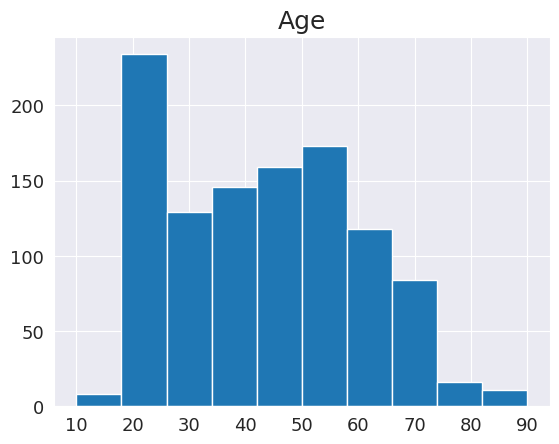

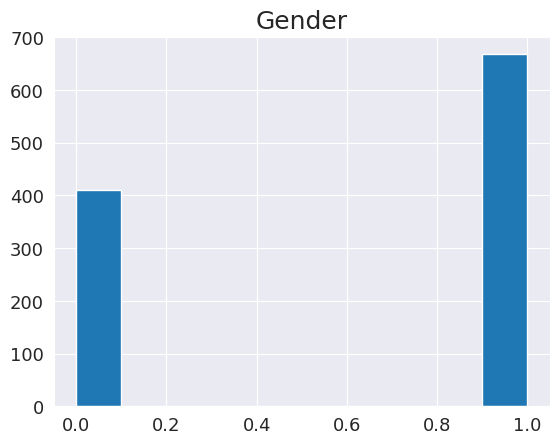

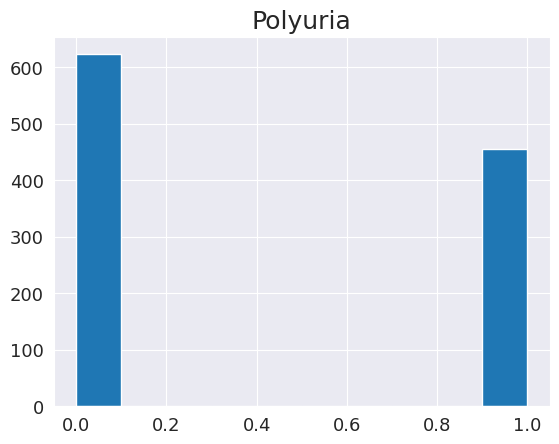

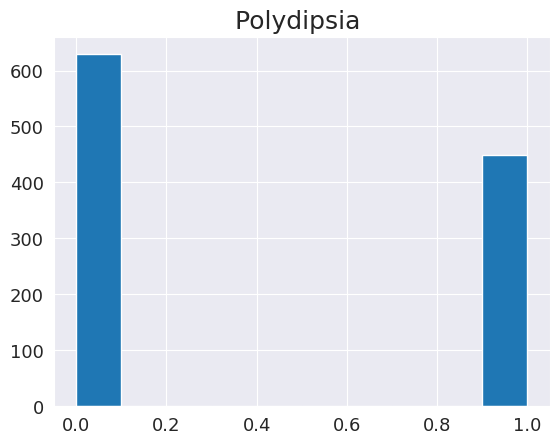

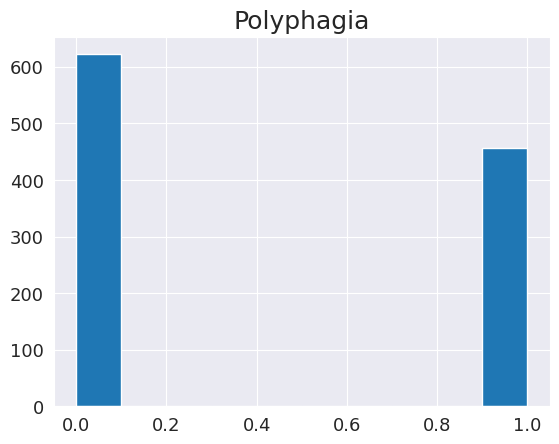

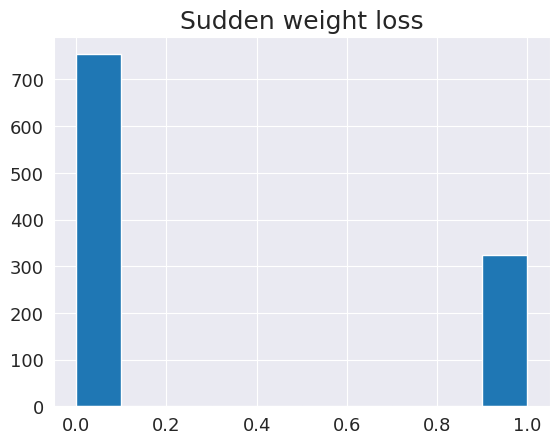

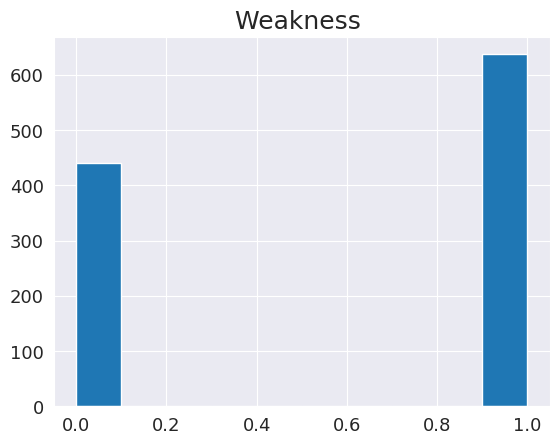

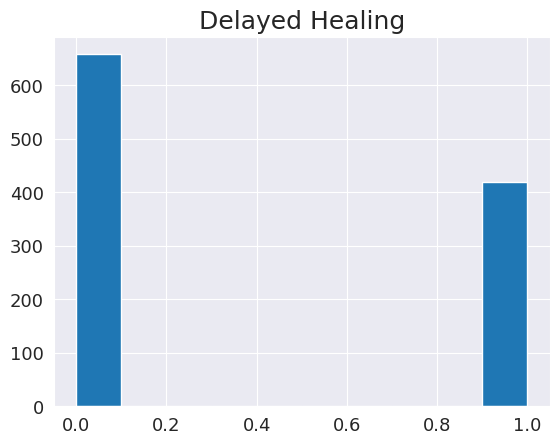

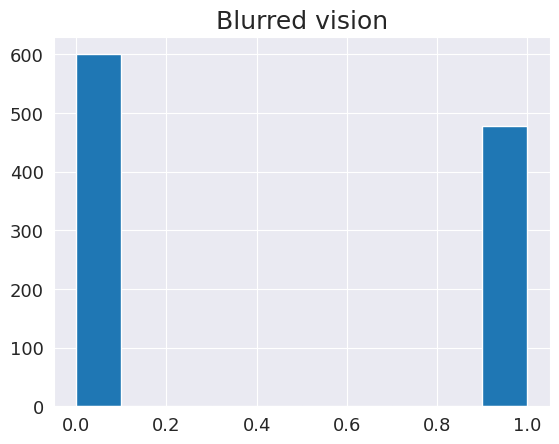

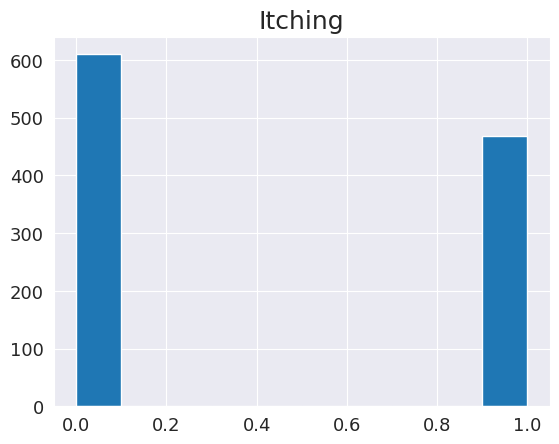

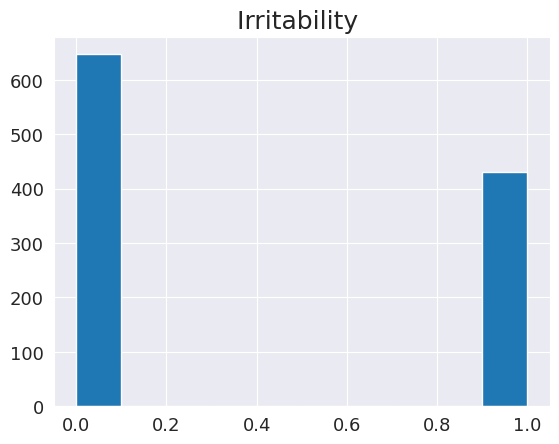

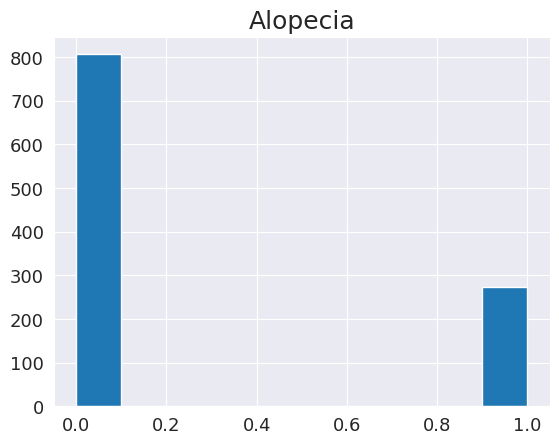

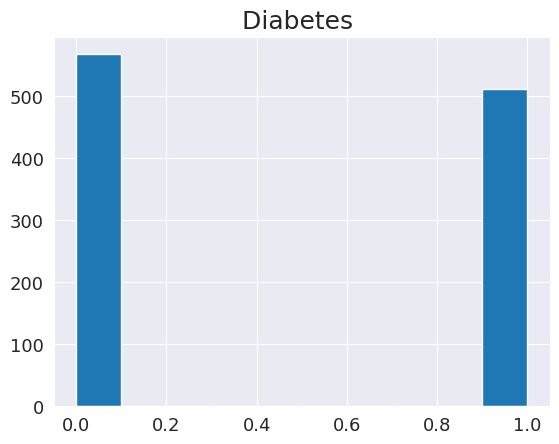

In [26]:
for i in cols:
  if data[i].dtypes == 'O':
    X = data[i].value_counts()
    plt.figure()
    plt.bar(X.index,X.values, width= 0.4)
    plt.title(i)
  else:
    plt.figure()
    plt.hist(data[i], bins = 10)
    
    plt.title(i)

#**Correlation Analysis**

<Axes: >

<Figure size 640x480 with 0 Axes>

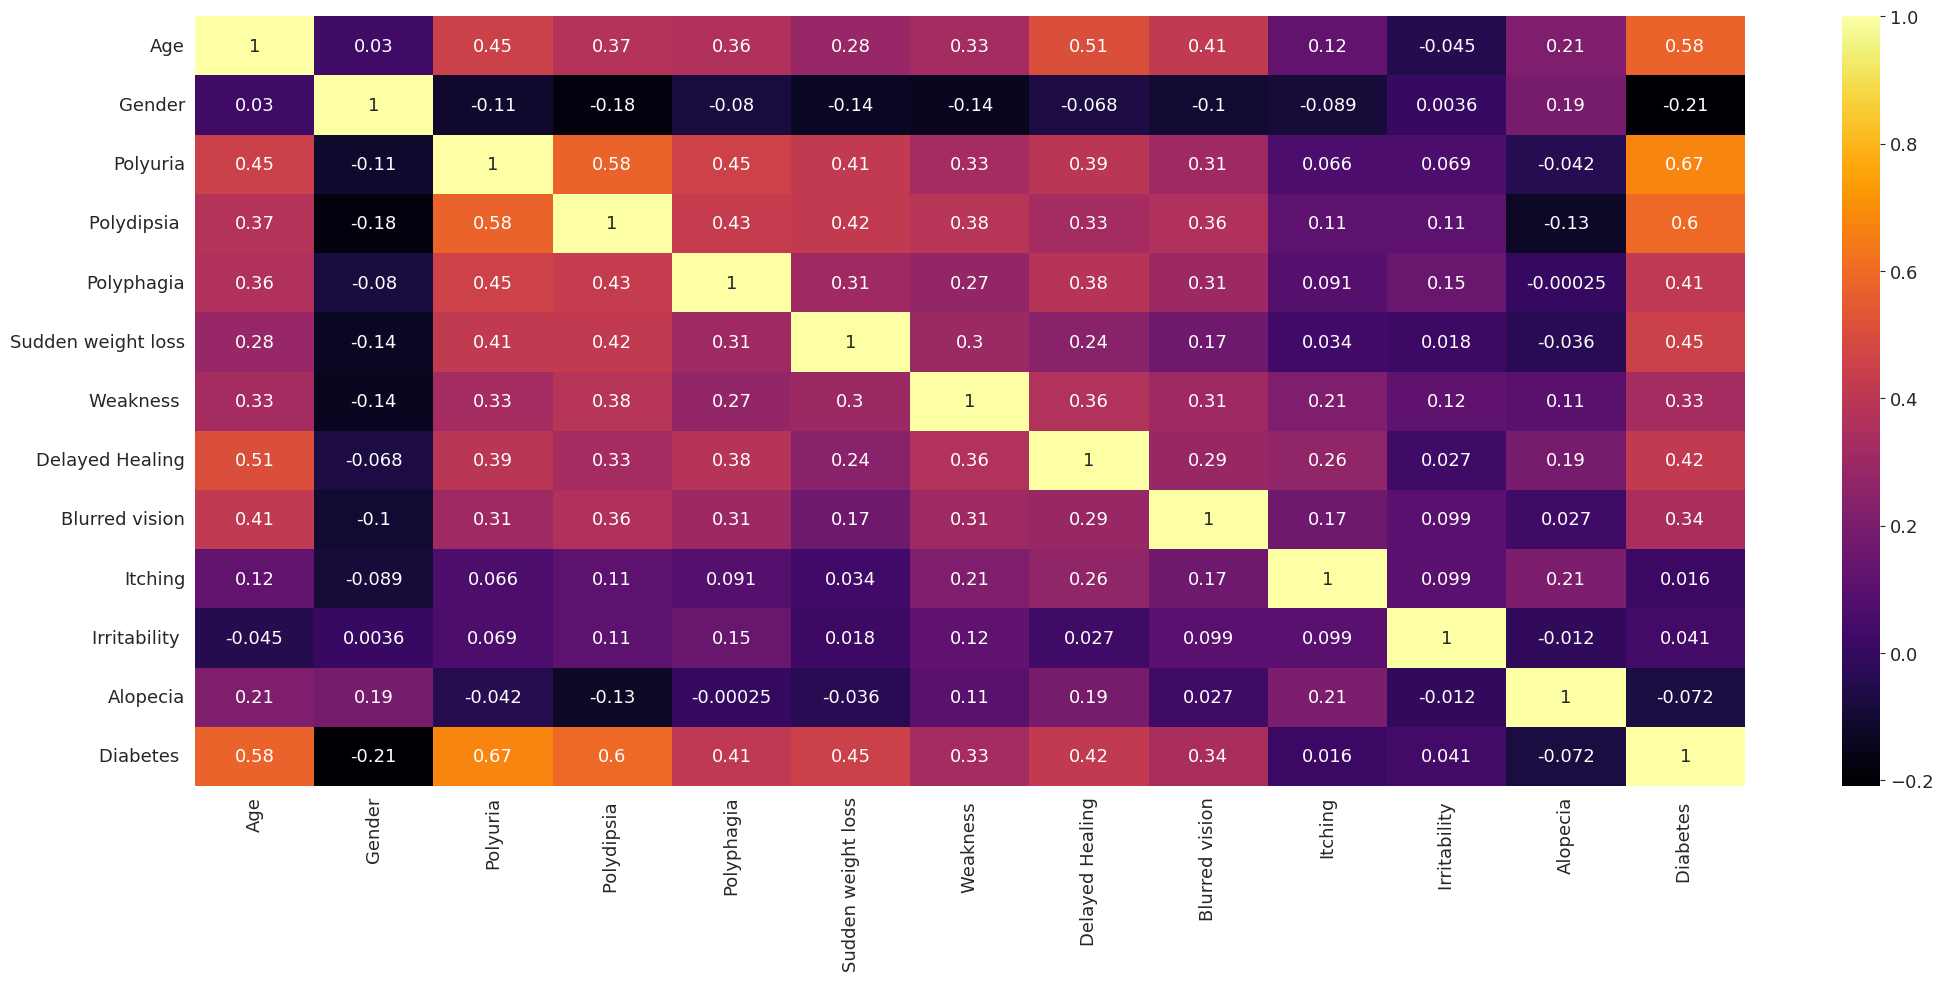

In [27]:
plt.figure()
plt.figure(figsize = (25,10))
sns.heatmap(data.corr(), cmap = 'inferno', annot = True)

From above we can see that other than **Age**, **Polyuria**, **Polydipsia** there is no significant attributes that has much correlation with **Diabetes**.**Gender** is negatively correlated with **Diabetes**. **Delayed Healing** has morderate correlation with **Age** and **Diabetes**.



#**t-Test**

In [28]:
from scipy import stats

for i in cols:
  for j in cols:
    if cols.index(j) <= cols.index(i):
      pass
    else:
      t_test, p_value = stats.ttest_ind(a = data[i], b = data[j], equal_var= False)
      if p_value > 0.05:  
        print("\n")
        print(">>> t-test between {} and {}:".format(i,j))
        print("The t-test value = ",t_test, " and p-value= ", p_value)



>>> t-test between Gender and Weakness :
The t-test value =  1.36584838499317  and p-value=  0.17212917123177318


>>> t-test between Polyuria and Polydipsia :
The t-test value =  0.2617547836040257  and p-value=  0.7935355282065055


>>> t-test between Polyuria and Polyphagia:
The t-test value =  -0.043579192299511106  and p-value=  0.9652438773198178


>>> t-test between Polyuria and Delayed Healing:
The t-test value =  1.5351462342762938  and p-value=  0.12489479815834896


>>> t-test between Polyuria and Blurred vision:
The t-test value =  -0.9995334413530939  and p-value=  0.3176486215157999


>>> t-test between Polyuria and Itching:
The t-test value =  -0.5656086744618849  and p-value=  0.5717187411482689


>>> t-test between Polyuria and Irritability :
The t-test value =  1.0503319002075535  and p-value=  0.29368337511216897


>>> t-test between Polydipsia  and Polyphagia:
The t-test value =  -0.3053355300377606  and p-value=  0.7601401202080108


>>> t-test between Polydipsia

#**Outlier detection**

In [29]:
def univariate_outlier_detection(column):

  print("\n\n-----------------------  {n}  ------------------------".format(n = column))

  mean = data[column].mean()
  median = data[column].median()
  mode = data[column].mode()

  print("\nMean:", mean, "\nMedian: ", median,"\nMode: ", mode[0])

  Q1 = data[column].quantile(q = 0.25)
  Q3 = data[column].quantile(q = 0.75)
  IQR = stats.iqr(data[column])

  print("\n\n1st quartile: ", Q1)
  print("3rd quartile: ", Q3)
  print("Inter-quartile Range: ", IQR)

  l_outlier_range = Q1 - 1.5*IQR
  u_outlier_range = Q3 + 1.5*IQR
  print("\n\nLower outlier range: ", l_outlier_range)
  print("Upper outlier range: ", u_outlier_range)

  print("\n\nNumber of outlier in upper range: ", data[data[column] > u_outlier_range][column].count())
  print("Number of outlier in lower range: ", data[data[column] < l_outlier_range][column].count())
  print("\n% of outlier in upper range: ", (data[data[column] > u_outlier_range][column].count()*100/len(data)))
  print("% of outlier in lower range: ", (data[data[column] < l_outlier_range][column].count()*100/len(data)))

  #Boxplot
  print("Boxplot of column " + column)
  plt.figure()
  ax = sns.boxplot(x = data[column])

  plt.show()



-----------------------  Age  ------------------------

Mean: 42.86879419631725 
Median:  43.0 
Mode:  22.0


1st quartile:  27.0
3rd quartile:  55.0
Inter-quartile Range:  28.0


Lower outlier range:  -15.0
Upper outlier range:  97.0


Number of outlier in upper range:  0
Number of outlier in lower range:  0

% of outlier in upper range:  0.0
% of outlier in lower range:  0.0
Boxplot of column Age


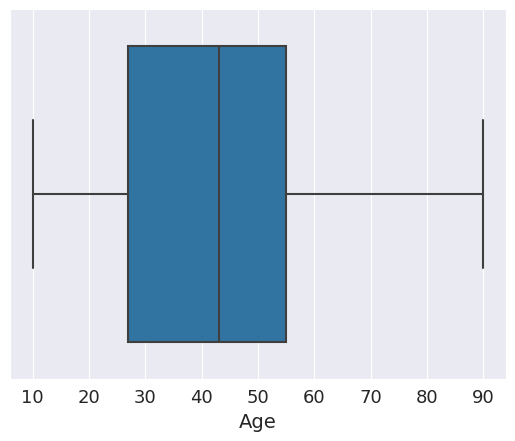

In [30]:
for i in cols:
  if data[i].dtypes == 'float64':
    univariate_outlier_detection(i)